### Workbook includes scripts for: 
##### *Schone et al., 2024, Biomimetic versus arbitrary motor control strategies for bionic hand skill learning, Nature Human Behaviour*
##### Figure 3. Embodiment
##### Figure 4. Training Tasks
##### Figure 5. Cognitive Load
##### Figure 6. EMG Euclidean Distances
##### Figure 7. Generalization
##### Supplementary Figure 1. Biological and bionic hand motor control

#### Imports

In [6]:
import pandas as pd
import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
from math import exp,sqrt
from scipy.stats import norm,zscore,sem
from itertools import groupby
import os
from scipy.spatial.distance import euclidean, mahalanobis, correlation
from matplotlib.patches import Rectangle
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
from matplotlib import image
import matplotlib.lines as lines
from matplotlib.gridspec import GridSpec

%pylab
%matplotlib inline
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

Using matplotlib backend: MacOSX
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['sqrt', 'exp', 'norm']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


#### Figure 3. Embodiment

/var/folders/8h/zxhgttmj2f34nzndlf83g24956s4s9/T/ipykernel_40616/1649395610.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(ax=axd['A'],y='value', x='measure',
/var/folders/8h/zxhgttmj2f34nzndlf83g24956s4s9/T/ipykernel_40616/1649395610.py:70: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(ax=axd['B'],y='pp_value', x='measure',


Text(0.14, 0.1, '"less similar to\nbiological hand"')

/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


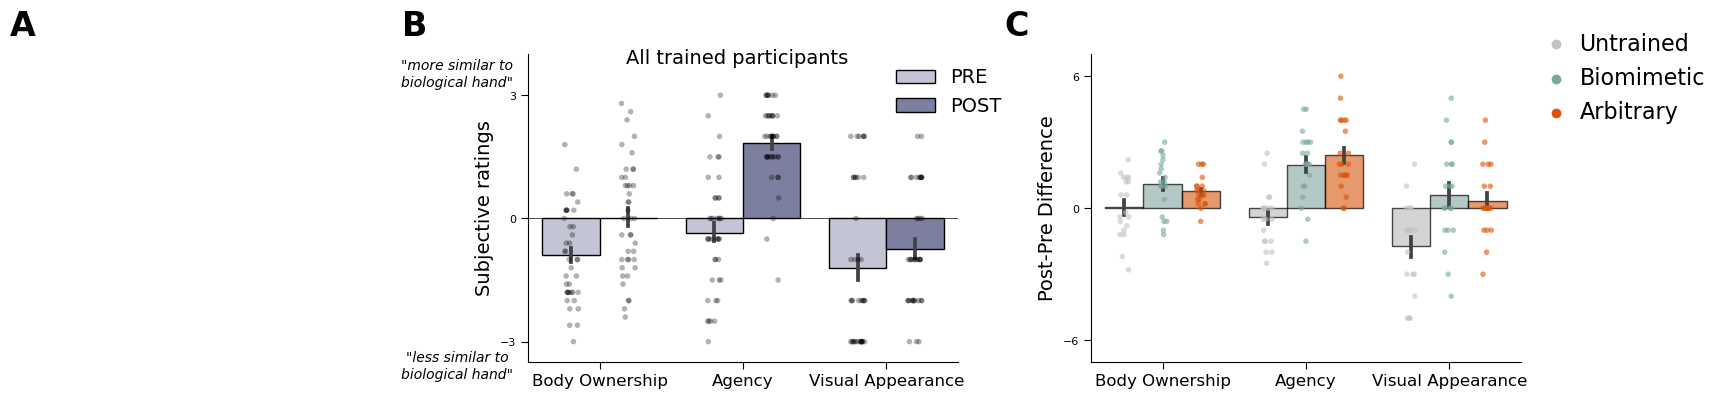

In [2]:
#=========================================================
#LOAD ALL DATA AND REFORMAT (WHERE NECESSARY)
#=========================================================
#embodiment
embod_all = pd.read_csv('./data/embodiment_seaborn.csv')
embod_all['group'] = embod_all['group'].map({0:'ctrl',1:'bio',2:'arb'})
embod_all['sess'] = embod_all['sess'].map({0:'PRE',1:'POST'})
embod_all['measure'] = embod_all['measure'].map({0:'bodown',1:'agency',2:'visapp'})
embod_all_trained = embod_all.loc[(embod_all.group != 'ctrl')]

#=========================================================
#COLORS
#=========================================================
colors = ['#8FB7B2','#F86612']
colors2 = ['#48706B','#9E3D05']
embodiment_colors = ['#C1C3D7','#777AA6']
embodiment_colors2 = ['#000000','#000000']
embod_colors = ['#C2C2C2','#8FB7B2','#F86612']
embod_colors2 = ['#666666','#48706B','#9E3D05']
embod_colors3 = ['#8FB7B2','#F86612']
embod_colors4 = ['#76A7A2','#DA5407']
embod_colors6 = ['#C2C2C2','#76A7A2','#DA5407']

#Define hue orders
hue_order = ['ctrl','bio','arb']
hues_order = ['bio', 'arb']

#=========================================================
#DEFINE MOASAIC FIGURE
#=========================================================
mosaic = [
    ["BLANK","A","BLANK","B"]]

fig = plt.figure(figsize=(14, 4))
axd = fig.subplot_mosaic(mosaic,empty_sentinel="BLANK",gridspec_kw={'width_ratios':[.06,1,0,1],"wspace": 0.3})

#=========================================================
#FIGURE: A - EMBODIMENT FOR TRAINED USERS ONLY
#=========================================================
sns.set_palette(embodiment_colors)
sns.barplot(ax=axd['A'],y='value', x='measure', 
                 data=embod_all_trained, 
                 hue='sess',
                 edgecolor=(0,0,0),ci=68)
sns.set_palette(embodiment_colors2)
sns.stripplot(ax=axd['A'],y='value', x='measure',
                   data=embod_all_trained, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue="sess",
                alpha=.3,s=4)
#Add legend
handles, labels = axd['A'].get_legend_handles_labels()
axd['A'].legend(handles[2:4],labels[2:4],bbox_to_anchor=(1.12, .98),borderaxespad=0,fontsize=14,frameon=False)
#Plot formating
axd['A'].axhline(y=0, color='black',linewidth = 0.5)
axd['A'].set_xticklabels(['Body Ownership','Agency','Visual Appearance'],fontsize=10)
axd['A'].set_xlabel('')
axd['A'].tick_params(axis='x', labelsize=12)
axd['A'].tick_params(axis='y', labelsize=8)
axd['A'].set_yticks([-3,0,3])
axd['A'].set_ylabel('Subjective ratings',fontsize = 14)
axd['A'].set_ylim([-3.5,4])

#=========================================================
#FIGURE: B - EMBODIMENT ALL PARTICIPANTS
#=========================================================
sns.set_palette(embod_colors)
sns.barplot(ax=axd['B'],y='pp_value', x='measure', 
                 data=embod_all, 
                 hue='group',
                 hue_order=hue_order,
                 edgecolor=(0,0,0),alpha=.7,ci=68)
sns.set_palette(embod_colors6)
sns.stripplot(ax=axd['B'],y='pp_value', x='measure',
                   data=embod_all, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group',
                   hue_order=hue_order,
                   alpha=.6,s=4)
handles, labels = axd['B'].get_legend_handles_labels()
labels = ['Untrained','Biomimetic','Arbitrary']
axd['B'].legend(handles[:3],labels[:3],bbox_to_anchor=(1.01, 1.1),borderaxespad=0,fontsize=16,frameon=False,handletextpad=0.05)
axd['B'].set_xlabel('')
axd['B'].set_ylabel('Post-Pre Difference',fontsize = 14)
axd['B'].set_xticks([0,1,2])
axd['B'].tick_params(axis='x', labelsize=12)
axd['B'].tick_params(axis='y', labelsize=8)
axd['B'].set_xticklabels(['Body Ownership','Agency','Visual Appearance'],fontsize=12)
axd['B'].set_ylim([-7,7])
axd['B'].set_yticks([-6,0,6])

#=========================================================
#ADDING ADDITIONAL LABLES, IMAGES AND TEXT
#=========================================================

#PANEL LABELS
fig.text(-.17, .95, 'A',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.11, .95, 'B',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.54, .95, 'C',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)

#PANEL A - EMBODIMENT TRAINED PARTICIPANTS
fig.text(.34, .87, 'All trained participants', horizontalalignment='center', verticalalignment='center',fontsize=14)
fig.text(.14, 0.83, '"more similar to\nbiological hand"',style='italic',horizontalalignment='center', verticalalignment='center',fontsize=10)
fig.text(.14, 0.1, '"less similar to\nbiological hand"',style='italic',horizontalalignment='center', verticalalignment='center',fontsize=10)

#### Figure 4. Training Tasks

##### Pressure data extraction code

In [ ]:
#Function to do conversion of files that didn't save raw calibrated pressure, but percentage instead, 6797g = 100%
def percentage_to_grams(percentage):
    return (percentage / 100) * 6797

#Path to plotting
indiv_plots_path = ''
os.makedirs(indiv_plots_path, exist_ok=True)

#Path to video analysis dataframe
video_analysis_df = pd.read_csv('./video_analysis_transfers.csv')

subj_dir = ''
data = []

for subj in os.listdir(subj_dir):
    if subj.startswith('sub-'):
        subj_path = os.path.join(subj_dir, subj)
        if os.path.isdir(subj_path):
            for session in os.listdir(subj_path):
                if session.startswith('sess'):
                    session_path = os.path.join(subj_path, session)
                    if os.path.isdir(session_path):
                        csv_file = os.path.join(session_path, 'pressure', f'{subj}.csv')  
                        if not os.path.isfile(csv_file):
                            continue
                        print(subj,session)
                        
                    try: 

                        subj_df = pd.read_csv(csv_file, sep='\n')
                        subj_df = subj_df.iloc[1:].apply(lambda row: row[0].split(','), axis=1, result_type='expand')
                        subj_df = subj_df.iloc[:, :-1]  # Drop the last column
                        subj_df.reset_index(drop=True, inplace=True)
                        subj_df = subj_df[~subj_df.apply(lambda row: row.astype(str).str.contains('\t').any(), axis=1)]

                        #USING IF DATA FROM BOTH SENSORS IS AVAILABLE
                        if subj_df.shape[1] == 3:
                            subj_df.columns = ['Seconds', 'sensor1', 'sensor2']
                            subj_df = subj_df.dropna(subset=['sensor1', 'sensor2'])
                            subj_df['sensor1'] = pd.to_numeric(subj_df['sensor1'], errors='coerce')
                            subj_df['sensor2'] = pd.to_numeric(subj_df['sensor2'], errors='coerce')

                            mean_avg_pressure_transfer = subj_df['sensor1'].mean()

                            #Identifying dataframes with percentage that need to be converted to grams
                            if mean_avg_pressure_transfer < 5:
                                subj_df['sensor1'] = subj_df['sensor1'].apply(percentage_to_grams)
                                subj_df['sensor2'] = subj_df['sensor2'].apply(percentage_to_grams)

                            subj_df['sensor1_diff'] = subj_df['sensor1'].diff()
                            subj_df['sensor2_diff'] = subj_df['sensor2'].diff()

                            #The starting point is when there is an increase in pressure on one sensor and not the other
                            start_signal_threshold = 20
                            a = (subj_df['sensor1_diff'] == 0) & (subj_df['sensor2_diff'] > start_signal_threshold)
                            b = (subj_df['sensor2_diff'] == 0) & (subj_df['sensor1_diff'] > start_signal_threshold)
                            c = a | b
                            start_idx = subj_df.index[c].min()
                            subj_df_new = subj_df.iloc[start_idx:].reset_index()
                            subj_df_new['avg_pressure'] = subj_df_new[['sensor1', 'sensor2']].mean(axis=1)

                            #ASSUMPTION 1: Average pressure must be above 5% maximum pressure to be considered a valid transfer
                            maximum_pressure = subj_df_new['avg_pressure'].max()
                            pressure_level = maximum_pressure*.05
                            pressure_level_overzero = subj_df_new.loc[(subj_df_new['avg_pressure'] > 0)] 
                            above_pressure_level = subj_df_new['avg_pressure'] > pressure_level

                        #USING IF DATA FROM ONLY ONE SENSOR IS AVAILABLE
                        elif subj_df.shape[1] == 2 and not subj_df[0].isnull().all(): # Assuming sensor2 is missing
                            subj_df.columns = ['Seconds', 'sensor1']
                            subj_df = subj_df.dropna(subset=['sensor1'])
                            subj_df['sensor1'] = pd.to_numeric(subj_df['sensor1'], errors='coerce')
                            mean_avg_pressure_transfer = subj_df['sensor1'].mean()

                            #Identifying dataframes with percentages that need to be converted to grams
                            if mean_avg_pressure_transfer < 5:
                                subj_df['sensor1'] = subj_df['sensor1'].apply(percentage_to_grams)
                            subj_df['sensor1_diff'] = subj_df['sensor1'].diff()
                            a = subj_df['sensor1_diff'] == 0
                            start_idx = subj_df.index[a].min()
                            subj_df_new = subj_df.iloc[start_idx:].reset_index()
                            subj_df_new['avg_pressure'] = subj_df_new[['sensor1']].mean(axis=1)
                            maximum_pressure = subj_df_new['avg_pressure'].max()
                            pressure_level = maximum_pressure*.05
                            pressure_level_overzero = subj_df_new.loc[(subj_df_new['avg_pressure'] > 0)] 
                            above_pressure_level = subj_df_new['avg_pressure'] > pressure_level

                        #Create position and length array filled with the index position of each true and the number of subsequent trues 
                        while True:
                            pos_and_length = []
                            for k, g in groupby(enumerate(above_pressure_level), key=lambda x: x[1]):
                                if k:
                                    g = list(g)
                                    pos_and_length.append([g[0][0], len(g)])

                            #ASSUMPTION 2: the trues has to be greater or equal to 7 time-points
                            pos_and_length = [item for item in pos_and_length if item[1] >= 7]
                            pos_and_length_df = pd.DataFrame(pos_and_length, columns=['start', 'len'])
                            transfers = pos_and_length_df.iloc[list(pos_and_length_df['len'].index)].sort_values(by=['start']).reset_index()
                            transfers['end'] = transfers['start'] + transfers['len']

                            #ASSUMPTION 3: instances where the time between transfers is less than 10 timepoints are seperate transfers
                            transfers['difference_trial_times'] = np.nan
                            for i in range(len(transfers) - 1):
                                transfers['difference_trial_times'].iloc[i] = transfers['start'][i+1] - transfers['end'][i]
                            invalid_idx = transfers['difference_trial_times'] < 10
                            if any(invalid_idx):
                                above_pressure_level[transfers[invalid_idx]['end']] = True
                            else:
                                break

                        #ASSUMPTION 4: instances where participants kept holding the pressure at the end of the study are not transfers
                        if not transfers.empty:  # Check if transfers dataframe is not empty
                            last_transfer_end_idx = transfers['end'].iloc[-1] -1  # Get the index position of the end timepoint of the last transfer
                            last_transfer_avg_pressure = subj_df_new['avg_pressure'].iloc[last_transfer_end_idx]
                            # If the average pressure at this index position is above 100, drop this transfer
                            if last_transfer_avg_pressure > 100:
                                transfers.drop(transfers.index[-1], inplace=True)

                        #ASSUMPTION 5: ONLY taking the total transfers from the video analysis
                        record = video_analysis_df[(video_analysis_df['subject'] == subj) & (video_analysis_df['session'] == session)]


                        #ONLY taking the total transfers from the video analysis csv file
                        # Check if the record is empty or if required_transfers is 0
                        if pd.isna(record['total_transfers'].iloc[0]):
                            print(f"No required transfers record found for {subj}, {session}. Skipping...")
                            continue

                        total_possible_transfers = record['total_transfers'].iloc[0]
                        total_possible_transfers = int(total_possible_transfers)

                        if total_possible_transfers == 0:
                            print(f"Skipping {subj} due to 0 required transfers.")
                            continue

                        # Sort transfers by length of 'true' trains in descending order and reset index
                        transfers = transfers.sort_values(by='len', ascending=False).reset_index(drop=True)
                        # Only keep the required number of transfers
                        transfers = transfers.head(total_possible_transfers)

                        #PLOTTING
                        plt.figure(figsize=(15, 3))
                        plt.plot(subj_df_new['avg_pressure'])
                        plt.plot(transfers['start'] - 1, np.ones(shape=(len(transfers), 1)), 'go')
                        plt.plot(transfers['end'] - 1, np.ones(shape=(len(transfers), 1)), 'ro')
                        plt.title(f"{subj} - {session}")
                        plt.savefig(indiv_plots_path+'/'+subj+'_'+session+'.png')
                        plt.close()                                

                        #taking the mean pressure within each epoch
                        avg_pressure_transfer = []
                        for i in range(len(transfers)):
                            avg_pressure_transfer.append(subj_df_new['avg_pressure'].iloc[transfers['start'][i]:transfers['end'][i]].mean())

                        #take the mean pressure of all transfers
                        mean_pressure_transfer = np.mean(avg_pressure_transfer)

                        #only taking the total pressure value
                        total_session_pressure = subj_df_new['avg_pressure'].mean()
                        total_session_pressure_overzero = pressure_level_overzero['avg_pressure'].mean()
                        #appending this to a larger dataframe
                        data.append({
                            'subject': subj,
                            'session': session,
                            'mean_pressure_transfer': mean_pressure_transfer,
                            'total_session_pressure': total_session_pressure,
                            'total_session_pressure_overzero': total_session_pressure_overzero

                        })

                    except Exception as e:
                        print(f"Error occurred for {subj}, {session}. Skipping...")
                        print(f"Error message: {str(e)}")

df = pd.DataFrame(data)
df['group'] = df['subject'].str[4:5]
df['group'] = df['group'].map({'a':2,'b':1,'c':0})

Text(0.63, 0.29, '3 gestures')

/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


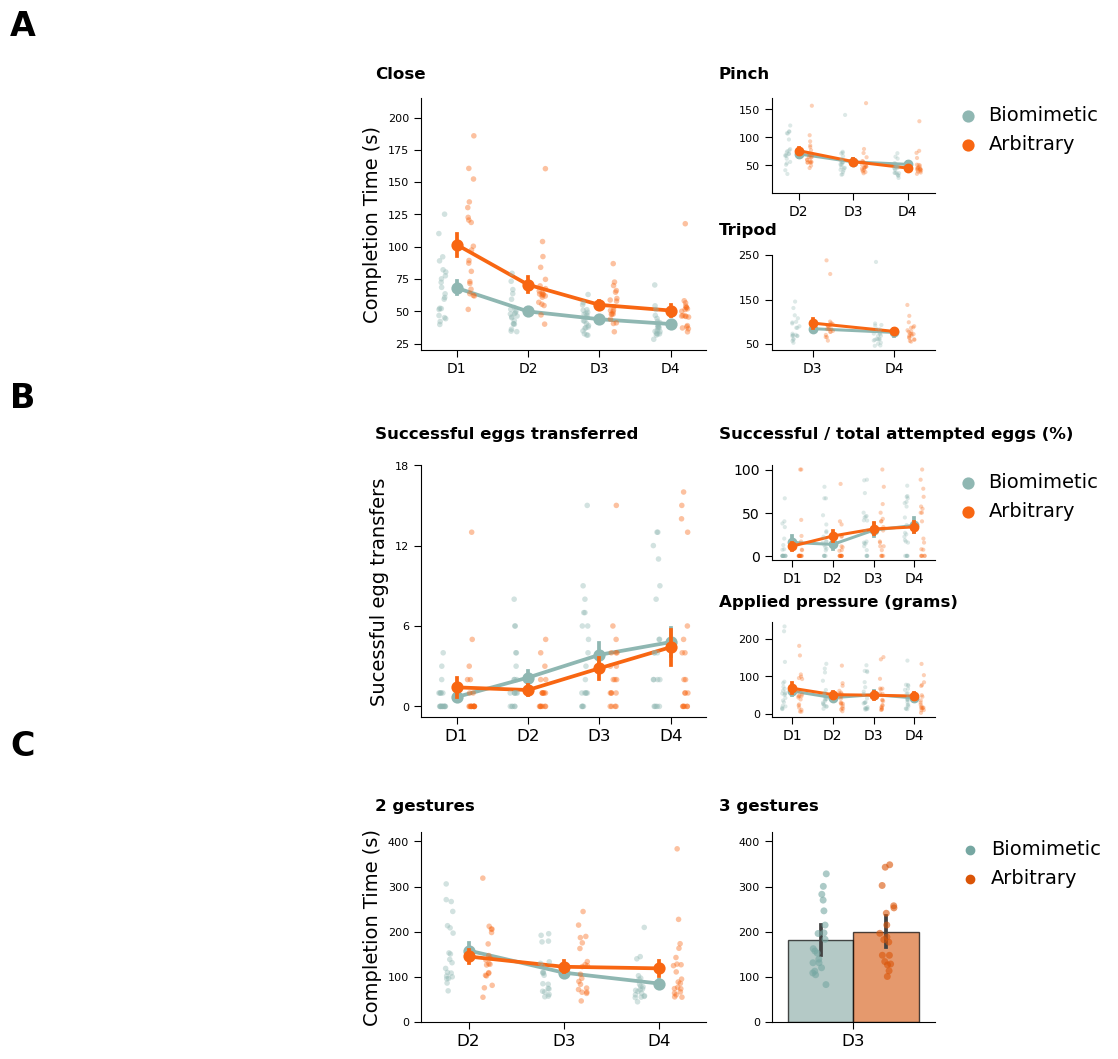

In [7]:
#=========================================================
#LOAD ALL DATA AND REFORMAT (WHERE NECESSARY)
#=========================================================
#speed 
all_subjs = pd.read_csv('./data/training_tasks.csv')
all_subjs['group'] = all_subjs['group'].map({0: 'No-training',1: 'Biomimetic',2: 'Arbitrary'})
all_subjs['sess'] = all_subjs['sess'].map({2:'D1',3:'D2',4:'D3',5:'D4'})
obj1 = all_subjs.loc[(all_subjs.group != 'No-training') & (all_subjs.object_type == 0) & (all_subjs.sess != 'D5') & (all_subjs.subj != 'sub-ar02')] #Speed - close
obj2 = all_subjs.loc[(all_subjs.group != 'No-training') & (all_subjs.object_type == 1) & (all_subjs.sess != 'D5')] #Speed - pinch
obj3 = all_subjs.loc[(all_subjs.group != 'No-training') & (all_subjs.object_type == 2) & (all_subjs.sess != 'D5')] #Speed - tripod
#eggs
eggs = pd.read_csv('./data/eggs.csv')
eggs = eggs.loc[(eggs.group != 0) & (eggs.session != 'sess6')]
eggs['group'] = eggs['group'].map({1: 'Biomimetic',2: 'Arbitrary'})
eggs['sess'] = eggs['session'].map({'sess2':'D1','sess3':'D2','sess4':'D3','sess5':'D4'}) 

#gesture switching 
grips = pd.read_csv('./data/grip_changes.csv')
grips = grips.loc[(grips.subj != 'sub-bi15')]
grips['group'] = grips['group'].map({0: 'No-training',1: 'Biomimetic',2: 'Arbitrary'})
grips['sess'] = grips['sess'].map({3:'D2',4:'D3',5:'D4'})
grips2 = grips.loc[(grips.sess == 'D3')]

#=========================================================
#LOAD IMAGES
#=========================================================
shap = image.imread('./images/SHAP.png')
close = image.imread('./images/close.png')
pinch = image.imread('./images/pinch.png')
tripod = image.imread('./images/tripod.png')
three_gest = image.imread('./images/3gest.png')
four_gest = image.imread('./images/4gest.png')
eggs_img = image.imread('./images/eggs.png')
leg = image.imread('./images/legend.png')
leg2 = image.imread('./images/legend2.png')
timer = image.imread('./images/timer.png')
gest = image.imread('./images/gesture.png')
egg_break = image.imread('./images/egg_break.png')
eggtask = image.imread('./images/egg_image.png')
#=========================================================
#COLORS
#=========================================================
colors = ['#8FB7B2','#F86612']
colors2 = ['#48706B','#9E3D05']
embodiment_colors = ['#C1C3D7','#777AA6']
embodiment_colors2 = ['#000000','#000000']
embod_colors = ['#C2C2C2','#8FB7B2','#F86612']
embod_colors2 = ['#666666','#48706B','#9E3D05']
embod_colors3 = ['#8FB7B2','#F86612']
embod_colors4 = ['#76A7A2','#DA5407']
embod_colors6 = ['#C2C2C2','#76A7A2','#DA5407']

#Define hue orders
hue_order = ['No-training','Biomimetic','Arbitrary']
hues_order = ['Biomimetic', 'Arbitrary']

#=========================================================
#DEFINE MOASAIC FIGURE
#=========================================================
mosaic = [
    ["BLANK","A","B"],
    ["BLANK","A","BLANK"],
    ["BLANK","A","C"],
    ["BLANK","BLANK","BLANK"],
    ["BLANK","D","G"],
    ["BLANK","D","BLANK"],
    ["BLANK","D","H"],
    ["BLANK","BLANK","BLANK"],
    ["BLANK","E","F"]]

fig = plt.figure(figsize=(8, 12))
axd = fig.subplot_mosaic(mosaic,empty_sentinel="BLANK",gridspec_kw={'height_ratios':[.5,.07,.5,.35,.5,.07,.5,.35,1],'width_ratios':[.1,.7,.4],"wspace": 0.4,"hspace": 0.3})

#=========================================================
#FIGURE: C - SPEED - OBJECT 1
#=========================================================
sns.set_palette(colors)
sns.pointplot(ax=axd['A'],x="sess",y="rt",data=obj1, hue='group',hue_order=hues_order,errorbar="se")
sns.stripplot(ax=axd['A'],x='sess',y='rt',data=obj1, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.4,s=4)
axd['A'].get_legend().remove()
handles, labels = axd['A'].get_legend_handles_labels()
labels = ['Biomimetic','Arbitrary']
axd['A'].legend(handles[:2],labels[:2],bbox_to_anchor=(2.4, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.05)
axd['A'].set_xticks([0,1,2,3])
axd['A'].tick_params(axis='x', labelsize=12)
axd['A'].tick_params(axis='y', labelsize=8)
axd['A'].set_xticklabels(['D1','D2','D3','D4'],fontsize=10)
axd['A'].set_ylim(20,215)
axd['A'].set_ylabel('Completion Time (s)',fontsize = 14)
axd['A'].set_xlabel('')

#=========================================================
#FIGURE: D - SPEED - OBJECT 2
#=========================================================
sns.pointplot(ax=axd['B'],x="sess",y="rt",data=obj2, hue='group',errorbar="se",scale=.8)
sns.stripplot(ax=axd['B'],x='sess',y='rt',data=obj2, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.3,s=3)
axd['B'].get_legend().remove()
axd['B'].set_xticks([0,1,2])
axd['B'].tick_params(axis='x', labelsize=12)
axd['B'].tick_params(axis='y', labelsize=8)
axd['B'].set_xticklabels(['D2','D3','D4'],fontsize=10)
axd['B'].set_yticks([50,100,150,200])
axd['B'].set_ylabel('',fontsize=10)
axd['B'].set_xlabel('')
axd['B'].set_ylim(0,170)

#=========================================================
#FIGURE: E - SPEED - OBJECT 3
#=========================================================
sns.pointplot(ax=axd['C'],x="sess",y="rt",data=obj3, hue='group',hue_order=hues_order,errorbar="se",scale=.8)
sns.stripplot(ax=axd['C'],x='sess',y='rt',data=obj3, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.3,s=3)
axd['C'].get_legend().remove()
axd['C'].set_xticks([0,1])
axd['C'].tick_params(axis='x', labelsize=12)
axd['C'].tick_params(axis='y', labelsize=8)
axd['C'].set_xticklabels(['D3','D4'],fontsize=10)
axd['C'].set_yticks([50,150,250])
axd['C'].set_ylabel('',fontsize=10)
axd['C'].set_xlabel('')

#=========================================================
#FIGURE: F - EGGS
#=========================================================
sns.pointplot(ax=axd['D'],x="sess",y="eggs_success",data=eggs, hue='group',hue_order=hues_order,errorbar="se")
sns.stripplot(ax=axd['D'],x='sess',y='eggs_success',data=eggs, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.4,s=4)
handles, labels = axd['D'].get_legend_handles_labels()
axd['D'].legend(handles[:2],labels[:2],bbox_to_anchor=(2.4, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.05)
axd['D'].set_xticks([0,1,2,3])
axd['D'].set_xticklabels(['D1','D2','D3','D4'],fontsize=10)
axd['D'].tick_params(axis='x', labelsize=12)
axd['D'].tick_params(axis='y', labelsize=8)
axd['D'].set_yticks([0,6,12,18])
axd['D'].set_ylabel('Sucessful egg transfers',fontsize=14)
axd['D'].set_xlabel('',fontsize=18)

# Not including ar01 and ar02 is subsequent plotting
eggs = eggs.loc[(eggs.subject != 'sub-ar01') & (eggs.subject !='sub-ar02')]

#=========================================================
#FIGURE: F - EGGS - percentage of total eggs
#=========================================================
sns.pointplot(ax=axd['G'],x="sess",y="percentage",data=eggs, hue='group',errorbar="se",scale=.8)
sns.stripplot(ax=axd['G'],x='sess',y='percentage',data=eggs, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.3,s=3)
axd['G'].get_legend().remove()
axd['G'].set_xticks([0,1,2,3])
axd['G'].set_xticklabels(['D1','D2','D3','D4'],fontsize=10)
axd['G'].tick_params(axis='x', labelsize=10)
axd['G'].tick_params(axis='y', labelsize=8)
axd['G'].set_yticks([0,.5,1])
axd['G'].set_yticklabels(['0','50','100'],fontsize=10)
axd['G'].set_ylabel('',fontsize=10)
axd['G'].set_xlabel('',fontsize=18)

#=========================================================
#FIGURE: F - EGGS - pressure
#=========================================================
sns.pointplot(ax=axd['H'],x="sess",y="total_session_pressure",data=eggs, hue='group',errorbar="se",scale=.8)
sns.stripplot(ax=axd['H'],x='sess',y='total_session_pressure',data=eggs, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.3,s=3)
axd['H'].get_legend().remove()
axd['H'].set_xticks([0,1,2,3])
axd['H'].set_xticklabels(['D1','D2','D3','D4'],fontsize=10)
axd['H'].tick_params(axis='x', labelsize=10)
axd['H'].tick_params(axis='y', labelsize=8)
#axd['H'].set_yticks([0,30,60,90])
axd['H'].set_ylabel('',fontsize=10)
axd['H'].set_xlabel('',fontsize=18)

#=========================================================
#FIGURE: G - GRIP SWITCHING - 3 GESTURES
#=========================================================
sns.pointplot(ax=axd['E'],x="sess",y="grip_change_1",data=grips, hue='group',hue_order=hues_order,errorbar="se")
sns.stripplot(ax=axd['E'],x='sess',y='grip_change_1',data=grips, jitter=True,dodge=True,marker='o', hue='group',hue_order=hues_order,alpha=.4,s=4)
axd['E'].get_legend().remove()
axd['E'].set_xticks([0,1,2])
axd['E'].set_xticklabels(['D2','D3','D4'],fontsize=10)
axd['E'].tick_params(axis='x', labelsize=12)
axd['E'].tick_params(axis='y', labelsize=8)
axd['E'].set_yticks([0,100,200,300,400])
axd['E'].set_ylim([0,420])
axd['E'].set_ylabel('Completion Time (s)',fontsize = 14)
axd['E'].set_xlabel('')

#=========================================================
#FIGURE: H - GRIP SWITCHING - ALL GESTURES
#=========================================================
sns.set_palette(embod_colors3)
sns.barplot(ax=axd['F'],x="sess",y="grip_change_2", 
                 data=grips2, 
                 hue='group',
                 hue_order=hues_order,
                 edgecolor=(0,0,0),alpha=.7)
sns.set_palette(embod_colors4)
sns.stripplot(ax=axd['F'],x="sess",y="grip_change_2",
                   data=grips2, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group',
                   hue_order=hues_order,
                   alpha=.6,s=5)
axd['F'].get_legend().remove()
handles, labels = axd['F'].get_legend_handles_labels()
axd['F'].legend(handles[:2],labels[:2],bbox_to_anchor=(1.05, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.05)
axd['F'].set_xticks([0])
axd['F'].set_xticklabels(['D3'],fontsize=10)
axd['F'].tick_params(axis='x', labelsize=12)
axd['F'].tick_params(axis='y', labelsize=8)
axd['F'].set_yticks([0,100,200,300,400])
axd['F'].set_ylim(0,420)
axd['F'].set_xlabel('')
axd['F'].set_ylabel('',fontsize=18)

#=========================================================
#ADDING ADDITIONAL LABLES, IMAGES AND TEXT
#=========================================================

#PANEL LABELS
fig.text(-.24, .94, 'A',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(-.24, .63, 'B',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(-.24, .34, 'C',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)

fig.text(.2, .9, 'Close', horizontalalignment='left', verticalalignment='center',fontsize=12,weight="bold")
fig.text(.63, .9, 'Pinch', horizontalalignment='left', verticalalignment='center',fontsize=12,fontweight="bold")
fig.text(.63, .77, 'Tripod', horizontalalignment='left', verticalalignment='center',fontsize=12,weight="bold")

fig.text(.2, .6, 'Successful eggs transferred', horizontalalignment='left', verticalalignment='center',fontsize=12,weight="bold")
fig.text(.63, .6, 'Successful / total attempted eggs (%)', horizontalalignment='left', verticalalignment='center',fontsize=12,weight="bold")
fig.text(.63, .46, 'Applied pressure (grams)', horizontalalignment='left', verticalalignment='center',fontsize=12,weight="bold")

fig.text(.2, .29, '2 gestures', horizontalalignment='left', weight="bold",verticalalignment='center',fontsize=12)
fig.text(.63, .29, '3 gestures', horizontalalignment='left', weight="bold",verticalalignment='center',fontsize=12)

#### Figure 5. Cognitive Load

/var/folders/8h/zxhgttmj2f34nzndlf83g24956s4s9/T/ipykernel_40616/2141521666.py:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.barplot(ax=axd['A'],y='blocks', x='pre_post',


Text(0.58, 0.15, '"as $\\bf{easy}$ as using\nmy own hand"')

/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/Users/schonehr/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


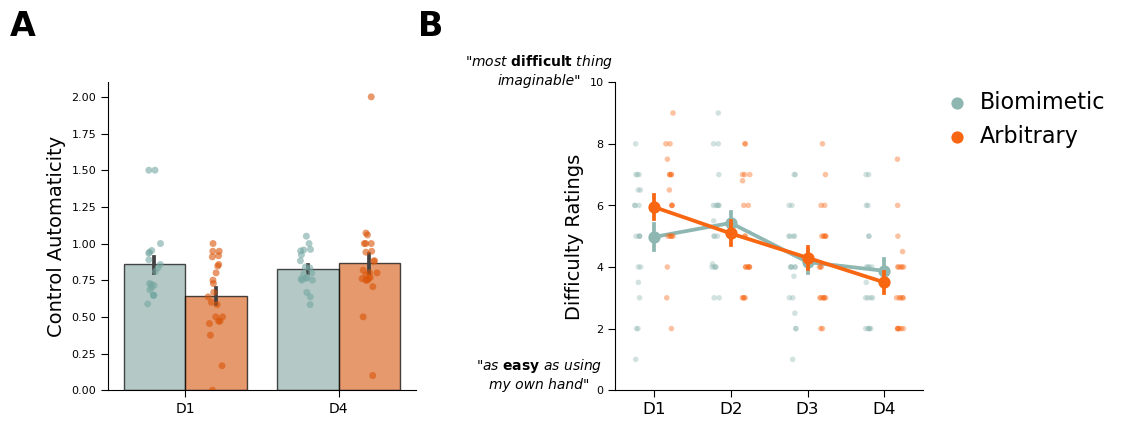

In [8]:
#=========================================================
#LOAD ALL DATA AND REFORMAT (WHERE NECESSARY)
#=========================================================
#cogload
cogload = pd.read_csv('./data/div_blocks_pre_post.csv')
cogload['group'] = cogload['group'].map({1: 'Biomimetic',2: 'Arbitrary'})
cogload['pre_post'] = cogload['pre_post'].map({0:'pre',1:'post'})
#control difficulty
ctrl_diff = pd.read_csv('./data/ctrl_diff_seaborn.csv')
ctrl_diff['group'] = ctrl_diff['group'].map({1: 'Biomimetic',2: 'Arbitrary'})
ctrl_diff['sess'] = ctrl_diff['sess'].map({2:'D1',3:'D2',4:'D3',5:'D4',6:'D5'})
ctrl_diff = ctrl_diff.loc[(ctrl_diff.group != 0) & (ctrl_diff.sess != 'D5')]

#=========================================================
#LOAD IMAGES
#=========================================================
blocks = image.imread('./images/blocks.png')
timer = image.imread('./images/timer.png')

#=========================================================
#COLORS
#=========================================================
colors = ['#8FB7B2','#F86612']
colors2 = ['#48706B','#9E3D05']
embodiment_colors = ['#C1C3D7','#777AA6']
embodiment_colors2 = ['#000000','#000000']
embod_colors = ['#C2C2C2','#8FB7B2','#F86612']
embod_colors2 = ['#666666','#48706B','#9E3D05']
embod_colors3 = ['#8FB7B2','#F86612']
embod_colors4 = ['#76A7A2','#DA5407']
embod_colors6 = ['#C2C2C2','#76A7A2','#DA5407']

#Define hue orders
hue_order = ['No-training','Biomimetic','Arbitrary']
hues_order = ['Biomimetic', 'Arbitrary']

#=========================================================
#DEFINE MOASAIC FIGURE
#=========================================================
fig = plt.figure(figsize=(12, 4))
axd = fig.subplot_mosaic(
    """
    XAXB
    """,empty_sentinel="X",gridspec_kw={'width_ratios':[.1,1,.1,1],"wspace": 0.5})

#=========================================================
#FIGURE
#=========================================================
sns.set_palette(embod_colors3)
sns.barplot(ax=axd['A'],y='blocks', x='pre_post', 
                 data=cogload, 
                 hue='group',
                hue_order=hues_order,
                edgecolor=(0,0,0),alpha=.7,ci=68)
sns.set_palette(embod_colors4)
sns.stripplot(ax=axd['A'],y='blocks', x='pre_post',
                   data=cogload, 
                   jitter=True,
                   dodge=True,
                   marker='o', 
                   hue='group',
                   hue_order=hues_order,
                   alpha=.6,s=5)
axd['A'].get_legend().remove()
axd['A'].set_ylabel('')
axd['A'].set_xticks([0, 1])
axd['A'].tick_params(axis='x', labelsize=12)
axd['A'].tick_params(axis='y', labelsize=8)
axd['A'].set_xticklabels(['D1','D4'],fontsize=10)
axd['A'].set_ylabel('Control Automaticity',fontsize=14)
axd['A'].set_xlabel('')

#=========================================================
#FIGURE: J - CONTROL DIFFICULTY
#=========================================================
sns.set_palette(colors)
sns.pointplot(ax=axd['B'],x="sess",y="ctrl_diff",data=ctrl_diff, hue='group',errorbar="se")
sns.stripplot(ax=axd['B'],x='sess',y='ctrl_diff',data=ctrl_diff, jitter=True,dodge=True,marker='o', hue='group',alpha=.4,s=4)
#add legend
handles, labels = axd['B'].get_legend_handles_labels()
axd['B'].legend(handles[:2],labels[:2],bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=16,frameon=False,handletextpad=0.01)
axd['B'].set_xticks([0,1,2,3])
axd['B'].set_xticklabels(['D1','D2','D3','D4'],fontsize=10)
axd['B'].tick_params(axis='x', labelsize=12)
axd['B'].tick_params(axis='y', labelsize=8)
axd['B'].set_yticks([0,2,4,6,8,10])
axd['B'].set_ylabel('Difficulty Ratings',fontsize=14)
axd['B'].set_xlabel('')

fig.text(.15, 1.02, 'A',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.49, 1.02, 'B',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.58, 0.91, "\"most " + r"$\bf{" + "difficult" + "}$" + " thing\nimaginable\"",style='italic',horizontalalignment='center', verticalalignment='center',fontsize=10)
fig.text(.58, 0.15, "\"as " + r"$\bf{" + "easy" + "}$" + " as using\nmy own hand\"",style='italic',horizontalalignment='center', verticalalignment='center',fontsize=10)

#### Figure 6 EMG Euclidean Distances

#### 6.a

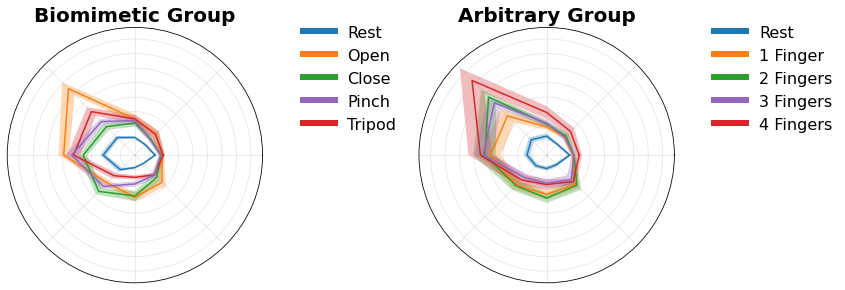

In [11]:
result_df = pd.read_csv(analysis_dir+'/all_subj_sess5_all-channels.csv')
result_df = result_df.drop(result_df.columns[0], axis=1)
result_df = result_df.drop(result_df.columns[1], axis=1)

group1_averages=[]
group1_sem=[]
group2_averages=[]
group2_sem=[]

#make averages for each row index for each group
#group 1
group1_df = result_df[result_df['group'] == 1]
rest_1 = group1_df[group1_df['Row Index'] == 0]
open_1 = group1_df[group1_df['Row Index'] == 17]
close_1  = group1_df[group1_df['Row Index'] == 18]
pinch_1  = group1_df[group1_df['Row Index'] == 38]
tripod_1  = group1_df[group1_df['Row Index'] == 40]
rest_avg_1 = rest_1.mean(axis=0)
rest_sem_1 = rest_1.sem(axis=0)
open_avg_1 = open_1.mean(axis=0)
open_sem_1 = open_1.sem(axis=0)
close_avg_1 = close_1.mean(axis=0)
close_sem_1 = close_1.sem(axis=0)
pinch_avg_1 = pinch_1.mean(axis=0)
pinch_sem_1 = pinch_1.sem(axis=0)
tripod_avg_1 = tripod_1.mean(axis=0)
tripod_sem_1 = tripod_1.sem(axis=0)

#group2
group2_df = result_df[result_df['group'] == 2]
rest_2 = group2_df[group2_df['Row Index'] == 0]
open_2 = group2_df[group2_df['Row Index'] == 17]
close_2  = group2_df[group2_df['Row Index'] == 18]
pinch_2  = group2_df[group2_df['Row Index'] == 38]
tripod_2  = group2_df[group2_df['Row Index'] == 40]
rest_avg_2 = rest_2.mean(axis=0)
rest_sem_2 = rest_2.sem(axis=0)
open_avg_2 = open_2.mean(axis=0)
open_sem_2 = open_2.sem(axis=0)
close_avg_2 = close_2.mean(axis=0)
close_sem_2 = close_2.sem(axis=0)
pinch_avg_2 = pinch_2.mean(axis=0)
pinch_sem_2 = pinch_2.sem(axis=0)
tripod_avg_2 = tripod_2.mean(axis=0)
tripod_sem_2 = tripod_2.sem(axis=0)

dfs_1 = [rest_avg_1,open_avg_1,close_avg_1,pinch_avg_1,tripod_avg_1]
dfs_2 = [rest_avg_2,open_avg_2,close_avg_2,pinch_avg_2,tripod_avg_2]

#put all averages into a single dataframe
group1_averages = pd.concat([rest_avg_1, open_avg_1, close_avg_1, pinch_avg_1, tripod_avg_1], axis=1).T
group1_sem = pd.concat([rest_sem_1, open_sem_1, close_sem_1, pinch_sem_1, tripod_sem_1], axis=1).T
group1_sem['Row Index'] = [0,17,18,38,40]

group2_averages = pd.concat([rest_avg_2, open_avg_2, close_avg_2, pinch_avg_2, tripod_avg_2], axis=1).T
group2_sem = pd.concat([rest_sem_2, open_sem_2, close_sem_2, pinch_sem_2, tripod_sem_2], axis=1).T
group2_sem['Row Index'] = [0,17,18,38,40]

# Add columns for mean and SEM
group1_averages['Value Type'] = 'Mean'
group1_sem['Value Type'] = 'SEM'
group2_averages['Value Type'] = 'Mean'
group2_sem['Value Type'] = 'SEM'

# Combine mean and SEM DataFrames for each group
group1_data = pd.concat([group1_averages, group1_sem], ignore_index=True)
group1_data['group'] = 1
group2_data = pd.concat([group2_averages, group2_sem], ignore_index=True)
group2_data['group'] = 2

# Combine data from both groups
combined_data = pd.concat([group1_data, group2_data], ignore_index=True)

# Filter the data
group1_df = combined_data[combined_data['group'] == 1]
group1_df = group1_df.set_index('Row Index')
group1_df = group1_df[group1_df['Value Type'] == 'Mean']
group1_df = group1_df.drop('group', axis=1)
group1_df = group1_df.drop('Value Type', axis=1)

group1_sem_df = combined_data[(combined_data['group'] == 1) & (combined_data['Value Type'] == 'SEM')]
group1_sem_df = group1_sem_df.set_index('Row Index')
group1_sem_df = group1_sem_df.drop('group', axis=1)
group1_sem_df = group1_sem_df.drop('Value Type', axis=1)

group2_df = combined_data[combined_data['group'] == 2]
group2_df = group2_df.set_index('Row Index')
group2_df = group2_df[group2_df['Value Type'] == 'Mean']
group2_df = group2_df.drop('group', axis=1)
group2_df = group2_df.drop('Value Type', axis=1)

group2_sem_df = combined_data[(combined_data['group'] == 2) & (combined_data['Value Type'] == 'SEM')]
group2_sem_df = group2_sem_df.set_index('Row Index')
group2_sem_df = group2_sem_df.drop('group', axis=1)
group2_sem_df = group2_sem_df.drop('Value Type', axis=1)

# Create an array of angles for the polar plot
angles = np.linspace(0, 2*np.pi, 9, endpoint=True)

# Create a figure and subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), subplot_kw={'projection': 'polar'})

# Plot for group 1
ax = axs[0]
legend_dict = {}
for i in range(group1_df.shape[0]):
    values = group1_df.iloc[i].values
    values = np.append(values, values[0])
    line, = ax.plot(angles, values)
    
    sem_values = group1_sem_df.iloc[i].values
    sem_values = np.append(sem_values, sem_values[0])

    lower_bound = values - sem_values
    upper_bound = values + sem_values
    
    ax.fill_between(angles, lower_bound, upper_bound, alpha=0.3)

    index_val = group1_df.index[i]
    if index_val == 0:
        legend_dict["Rest"] = line
    elif index_val == 17:
        legend_dict["Open"] = line
    elif index_val == 18:
        legend_dict["Close"] = line
    elif index_val == 40:
        legend_dict["Pinch"] = line
    elif index_val == 38:
        legend_dict["Tripod"] = line
        
ax.set_xticks(angles)
angle_ticks = np.linspace(0, 2*np.pi, 9, endpoint=True)
xtick_labels = ['Chan{}'.format(i+1) for i in range(len(angle_ticks)-1)]
ax.set_xticks(angle_ticks[:-1]) 
ax.set_xticklabels('', fontsize=14)
ax.set_yticklabels('')
ax.set_ylim(0,2200)
ax.grid(alpha=0.3)

legend_labels = ["Rest", "Open", "Close", "Pinch", "Tripod"]
legend_lines = [legend_dict[label] for label in legend_labels]
leg = ax.legend(legend_lines, legend_labels, loc='center left', bbox_to_anchor=(1.1, 0.8),fontsize=16,frameon=False)
ax.set_title('Biomimetic Group', fontweight='bold', fontsize=20)
for line in leg.get_lines():
    line.set_linewidth(6.0)
    
# Plot for group 2
ax = axs[1]
legend_dict = {}
for i in range(group2_df.shape[0]):
    values = group2_df.iloc[i].values
    values = np.append(values, values[0])
    line, = ax.plot(angles, values)
    
    sem_values = group2_sem_df.iloc[i].values
    sem_values = np.append(sem_values, sem_values[0])

    lower_bound = values - sem_values
    upper_bound = values + sem_values
    
    ax.fill_between(angles, lower_bound, upper_bound, alpha=0.3)

    index_val = group2_df.index[i]
    if index_val == 0:
        legend_dict["Rest"] = line
    elif index_val == 17:
        legend_dict["1 Finger"] = line
    elif index_val == 18:
        legend_dict["2 Fingers"] = line
    elif index_val == 40:
        legend_dict["3 Fingers"] = line
    elif index_val == 38:
        legend_dict["4 Fingers"] = line
        
ax.set_xticks(angles)
angle_ticks = np.linspace(0, 2*np.pi, 9, endpoint=True)
xtick_labels = ['Chan{}'.format(i+1) for i in range(len(angle_ticks)-1)]
ax.set_xticks(angle_ticks[:-1]) 
ax.set_xticklabels('', fontsize=14)
ax.set_yticklabels('')

legend_labels = ["Rest", "1 Finger", "2 Fingers", "3 Fingers", "4 Fingers"]
legend_lines = [legend_dict[label] for label in legend_labels]
leg = ax.legend(legend_lines, legend_labels, loc='center left', bbox_to_anchor=(1.1, 0.8),fontsize=16,frameon=False)
ax.set_title('Arbitrary Group', fontweight='bold', fontsize=20)
for line in leg.get_lines():
    line.set_linewidth(6.0)
ax.set_ylim(0,2200)
ax.grid(alpha=0.3)

plt.tight_layout()

Text(0.5, 0.98, 'Biomimetic Subjects')

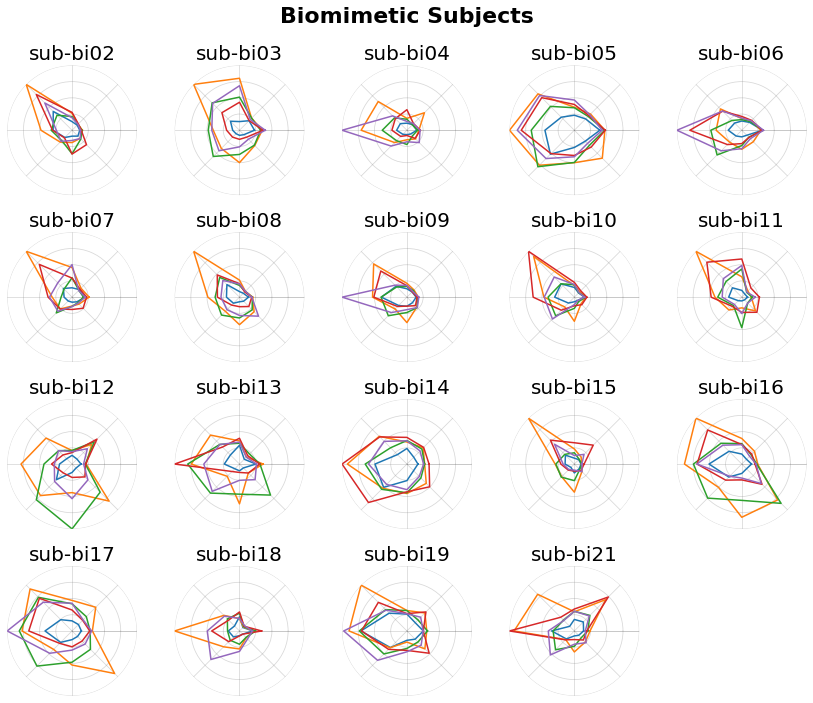

In [7]:
result_df = pd.read_csv(analysis_dir + '/all_subj_sess5_all-channels.csv')
result_df = result_df.drop(result_df.columns[0], axis=1)
result_df = result_df.drop(result_df.columns[1], axis=1)
group1_df = result_df[result_df['group'] == 1]
group1_df = group1_df.drop('group', axis=1)

# Get the unique subjects and sort them
subjects = sorted(group1_df['Subject'].unique())

# Calculate the number of rows and columns for the subplot grid
num_plots = len(subjects)
num_cols = int(np.ceil(np.sqrt(num_plots)))
num_rows = int(np.ceil(num_plots / num_cols))

# Create a figure and subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate through subjects and plot polar plots
for i, subject in enumerate(subjects):
    # Get the data for the current subject
    subject_data = group1_df[group1_df['Subject'] == subject]

    # Plot the polar plot for the current subject
    ax = axs[i]
    legend_dict = {}
    max_value = 0 
    for j, row_index in enumerate(subject_data['Row Index'].unique()):
        values = subject_data[subject_data['Row Index'] == row_index].values[0][2:]
        values = np.append(values, values[0])
        line, = ax.plot(np.linspace(0, 2*np.pi, 9, endpoint=True), values)
        legend_dict[row_index] = line
        max_value = max(max_value, np.max(values))  # Update the max value

    # Set title for the polar plot
    ax.set_title(f"{subject}", fontsize=20)

    # Remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='gray', alpha=0.3)

    # Add x and y ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 9, endpoint=True))
    ax.set_yticks(np.linspace(0, max_value, 5))

    # Set grid properties
    ax.grid(color='gray', alpha=0.3)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, max_value)
    
# Remove any unused subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[j])
    
fig.suptitle('Biomimetic Subjects',weight='bold',fontsize=22)

Text(0.5, 0.98, 'Arbitrary Subjects')

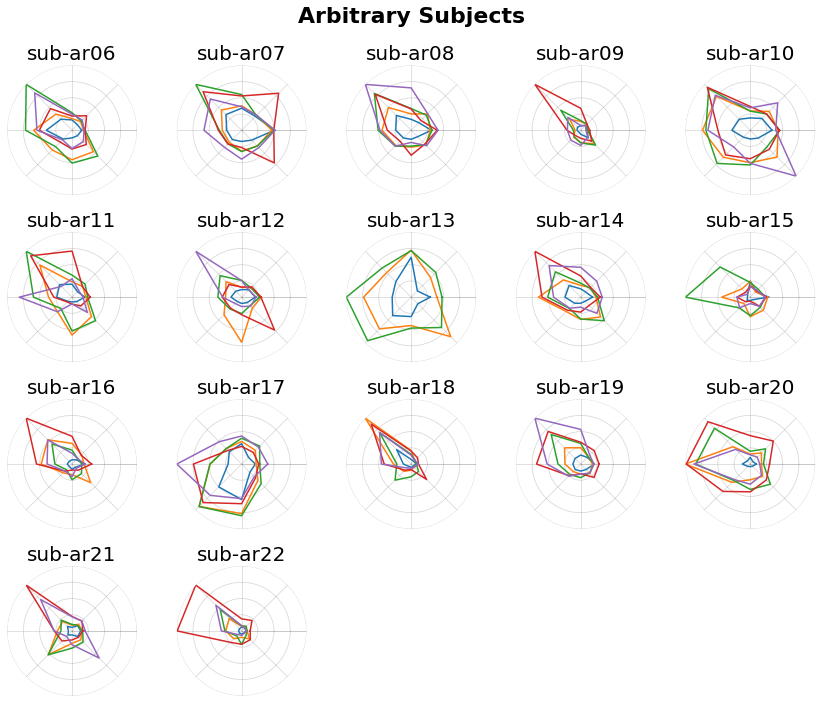

In [6]:
analysis_dir = ''
result_df = pd.read_csv(analysis_dir + '/all_subj_sess5_all-channels.csv')
result_df = result_df.drop(result_df.columns[0], axis=1)
result_df = result_df.drop(result_df.columns[1], axis=1)
group2_df = result_df[result_df['group'] == 2]
group2_df = group2_df.drop('group', axis=1)

# Get the unique subjects and sort them
subjects = sorted(group2_df['Subject'].unique())

# Calculate the number of rows and columns for the subplot grid
num_plots = len(subjects)
num_cols = int(np.ceil(np.sqrt(num_plots)))
num_rows = int(np.ceil(num_plots / num_cols))

# Create a figure and subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10), subplot_kw={'projection': 'polar'})

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate through subjects and plot polar plots
for i, subject in enumerate(subjects):
    # Get the data for the current subject
    subject_data = group2_df[group2_df['Subject'] == subject]

    # Plot the polar plot for the current subject
    ax = axs[i]
    legend_dict = {}
    max_value = 0 
    for j, row_index in enumerate(subject_data['Row Index'].unique()):
        values = subject_data[subject_data['Row Index'] == row_index].values[0][2:]
        values = np.append(values, values[0])
        line, = ax.plot(np.linspace(0, 2*np.pi, 9, endpoint=True), values)       
        legend_dict[row_index] = line
        max_value = max(max_value, np.max(values))  # Update the max value

    # Set title for the polar plot
    ax.set_title(f"{subject}", fontsize=20)

    # Remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(color='gray', alpha=0.3)

    # Add x and y ticks
    ax.set_xticks(np.linspace(0, 2 * np.pi, 9, endpoint=True))
    ax.set_yticks(np.linspace(0, max_value, 5))

    # Set grid properties
    ax.grid(color='gray', alpha=0.3)
    ax.spines['polar'].set_visible(False)
    ax.set_ylim(0, max_value)
    
# Remove any unused subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axs[j])
    
fig.suptitle('Arbitrary Subjects',weight='bold',fontsize=22)

##### 6.b

<ipython-input-2-79aa6aa87c3a>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['row_index'] = group1['row_index'].replace(38, 42)
<ipython-input-2-79aa6aa87c3a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group1['row_index_2'] = group1['row_index_2'].replace(38, 42)
<ipython-input-2-79aa6aa87c3a>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

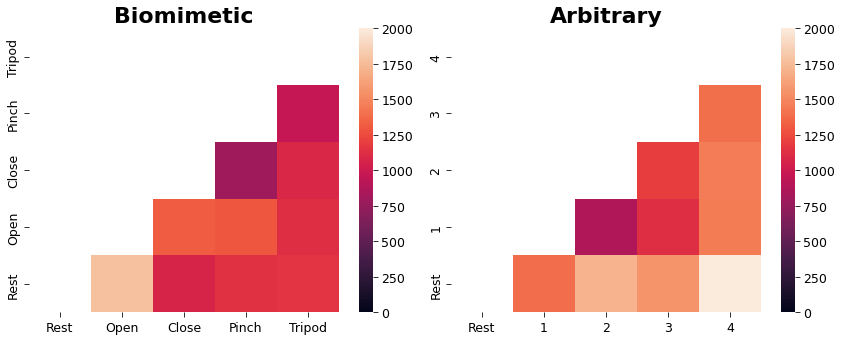

In [2]:
#Define path to data
analysis_dir = ''

df = pd.read_csv(analysis_dir + '/all_subj_sess5_all-channels.csv')
distances_matrix = pd.DataFrame(columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance'])
subjects = df['Subject'].unique()

for subject in subjects:
    subject_df = df[df['Subject'] == subject]
    group_distances = []
    for i in range(len(subject_df)):
        for j in range(i + 1, len(subject_df)):
            row_index = subject_df['Row Index'].iloc[i]
            row_index_2 = subject_df['Row Index'].iloc[j]
            row1 = subject_df.iloc[i]['Channel 1':'Channel 8']
            row2 = subject_df.iloc[j]['Channel 1':'Channel 8']
            euclidean_distance = euclidean(row1, row2)
            #Append the distance and other information to the group_distances list
            group_distances.append([subject, row_index, row_index_2, euclidean_distance])
    
    # Append the group_distances list to the distances_matrix dataframe
    distances_matrix = distances_matrix.append(pd.DataFrame(group_distances, columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance']), ignore_index=True)

distances_matrix['Group'] = distances_matrix['Subject'].str[4:5]
distances_matrix['Group'] = distances_matrix['Group'].map({'a':2,'b':1,'c':0})
average_euclideans_with_rest = distances_matrix[distances_matrix['row_index'] == 'avg_with-rest']
average_euclideans_no_rest = distances_matrix[distances_matrix['row_index'] == 'avg_no-rest']

averaged_df = distances_matrix.groupby(['row_index', 'row_index_2', 'Group'])['euclidean_distance'].mean().reset_index()
group1 = averaged_df[averaged_df['Group'] == 1]
group2 = averaged_df[averaged_df['Group'] == 2]

#i want tripod to be on the outer side
group1['row_index'] = group1['row_index'].replace(38, 42)
group1['row_index_2'] = group1['row_index_2'].replace(38, 42)
group2['row_index'] = group2['row_index'].replace(38, 42)
group2['row_index_2'] = group2['row_index_2'].replace(38, 42)

#im swapping just the last row values so they match
last_row_index_1 = group1.index[-1]

# Get the values in 'row_index' and 'row_index_2' columns for the last row
row_index_value_1 = group1.at[last_row_index_1, 'row_index']
row_index_2_value_1 = group1.at[last_row_index_1, 'row_index_2']

# Swap the values
group1.at[last_row_index_1, 'row_index'] = row_index_2_value_1
group1.at[last_row_index_1, 'row_index_2'] = row_index_value_1

last_row_index_2 = group2.index[-1]
# Get the values in 'row_index' and 'row_index_2' columns for the last row
row_index_value_2 = group2.at[last_row_index_2, 'row_index']
row_index_2_value_2 = group2.at[last_row_index_2, 'row_index_2']
group2.at[last_row_index_2, 'row_index'] = row_index_2_value_2
group2.at[last_row_index_2, 'row_index_2'] = row_index_value_2

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for idx, group_df in enumerate([group1, group2]):
    matrix = np.zeros((5, 5))

    # Iterate through the dataframe and fill the matrix with Euclidean distances
    for _, row in group_df.iterrows():
        row_index = row['row_index']
        row_index_2 = row['row_index_2']
        euclidean_distance = row['euclidean_distance']

        # Find the indices corresponding to the row_index and row_index_2 values in the list
        i = [0, 17, 18, 40, 42].index(row_index)
        j = [0, 17, 18, 40, 42].index(row_index_2)

        # Fill the matrix with the Euclidean distance
        matrix[i, j] = euclidean_distance
        
        # Create a mask for zero cells
        mask = np.zeros_like(matrix)
        mask[matrix == 0] = True

        # Create a colormap with white for zero values and 'viridis' for non-zero values
        cmap = sns.cm.rocket
        cmap.set_bad('white')

    # Create a heatmap plot using seaborn
    ax = sns.heatmap(matrix, annot=False, cmap=cmap, ax=axs[idx], vmin=0, vmax=2000,mask=mask)

    # Set the tick labels and axis labels
    tick_labels_bio = ['Rest', 'Open', 'Close', 'Pinch', 'Tripod']
    tick_labels_arb = ['Rest', '1', '2', '3', '4']
    ax.set_xticks(np.arange(5) + 0.5)
    ax.set_yticks(np.arange(5) + 0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_ylim(0, 5)
    
    if idx == 0:
        ax.set_title("Biomimetic",fontsize=22,weight='bold')
        ax.set_xticklabels(tick_labels_bio)
        ax.set_yticklabels(tick_labels_bio)

    else:
        ax.set_title("Arbitrary",fontsize=22,weight='bold')
        ax.set_xticklabels(tick_labels_arb)
        ax.set_yticklabels(tick_labels_arb)

plt.tight_layout()

##### 6.c

Text(0.5, 1.0, 'Average Euclidean Distance\n between all trained gestures')

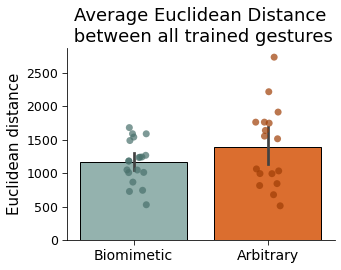

In [4]:
analysis_dir = ''
df = pd.read_csv(analysis_dir + '/all_subj_sess5_all-channels.csv')
distances_matrix = pd.DataFrame(columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance'])
subjects = df['Subject'].unique()

for subject in subjects:
    subject_df = df[df['Subject'] == subject]
    group_distances = []

    for i in range(len(subject_df)):
        for j in range(i + 1, len(subject_df)):
            row_index = subject_df['Row Index'].iloc[i]
            row_index_2 = subject_df['Row Index'].iloc[j]
            row1 = subject_df.iloc[i]['Channel 1':'Channel 8']
            row2 = subject_df.iloc[j]['Channel 1':'Channel 8']
            euclidean_distance = euclidean(row1, row2)
            # Append the distance and other information to the group_distances list
            group_distances.append([subject, row_index, row_index_2, euclidean_distance])
    
    # Append the group_distances list to the distances_matrix dataframe
    distances_matrix = distances_matrix.append(pd.DataFrame(group_distances, columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance']), ignore_index=True)

    #this does the average for all gestures - rest included
    subject_avg = distances_matrix[distances_matrix['Subject'] == subject]['euclidean_distance'].mean()
    avg_row = pd.DataFrame([[subject, 'avg_with-rest', 'avg_with-rest', subject_avg]], columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance'])
    distances_matrix = distances_matrix.append(avg_row, ignore_index=True)

distances_matrix['Group'] = distances_matrix['Subject'].str[4:5]
distances_matrix['Group'] = distances_matrix['Group'].map({'a':2,'b':1,'c':0})
average_euclideans_with_rest = distances_matrix[distances_matrix['row_index'] == 'avg_with-rest']

fig, axes = plt.subplots(figsize=(5, 4),sharey=True)

custom_palette = ['#8FB7B2','#F86612']
custom_palette_2 = ['#48706B','#9E3D05']

sns.barplot( x='Group', y='euclidean_distance', data=average_euclideans_with_rest, edgecolor='black',palette=custom_palette)
sns.stripplot(x='Group', y='euclidean_distance', dodge=False,data=average_euclideans_with_rest,color='black',alpha=.7,s=7,palette=custom_palette_2)
axes.set(xlabel="",ylabel="Average euclidean distance between gestures")
axes.set(xlabel="",ylabel="Euclidean distance")
axes.set_xticks([0,1]) 
axes.set_xticklabels(['Biomimetic','Arbitrary'], fontsize=14)

plt.title("Average Euclidean Distance\n between all trained gestures")

#### 6.d

Text(0.5, 1.0, 'Average Euclidean distance\n between first two trained gestures')

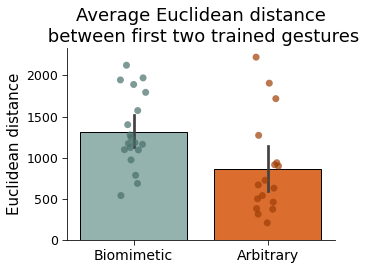

In [5]:
analysis_dir = ''
df = pd.read_csv(analysis_dir + '/all_subj_sess5_all-channels.csv')
distances_matrix = pd.DataFrame(columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance'])
subjects = df['Subject'].unique()

for subject in subjects:
    subject_df = df[df['Subject'] == subject]
    group_distances = []
    subject_df = subject_df[subject_df['Row Index'].isin([17, 18])]

    for i in range(len(subject_df)):
        for j in range(i + 1, len(subject_df)):
            row_index = subject_df['Row Index'].iloc[i]
            row_index_2 = subject_df['Row Index'].iloc[j]
            row1 = subject_df.iloc[i]['Channel 1':'Channel 8']
            row2 = subject_df.iloc[j]['Channel 1':'Channel 8']
            euclidean_distance = euclidean(row1, row2)
            # Append the distance and other information to the group_distances list
            group_distances.append([subject, row_index, row_index_2, euclidean_distance])
    
    # Append the group_distances list to the distances_matrix dataframe
    distances_matrix = distances_matrix.append(pd.DataFrame(group_distances, columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance']), ignore_index=True)

    #also add the euclidean average when not including rest 
    no_rest_rows = distances_matrix[distances_matrix['row_index'] != 0]
    subject_avg_norest = no_rest_rows[no_rest_rows['Subject'] == subject]['euclidean_distance'].mean()
    avg_row_no_rest = pd.DataFrame([[subject, 'avg_no-rest', 'avg_no-rest', subject_avg_norest]], columns=['Subject', 'row_index', 'row_index_2', 'euclidean_distance'])
    distances_matrix = distances_matrix.append(avg_row_no_rest, ignore_index=True)

distances_matrix['Group'] = distances_matrix['Subject'].str[4:5]
distances_matrix['Group'] = distances_matrix['Group'].map({'a':2,'b':1})
average_euclideans_no_rest = distances_matrix[distances_matrix['row_index'] == 'avg_no-rest']

fig, axes = plt.subplots(figsize=(5, 4),sharey=True)

custom_palette = ['#8FB7B2','#F86612']
custom_palette_2 = ['#48706B','#9E3D05']

sns.barplot( x='Group', y='euclidean_distance', data=average_euclideans_no_rest, edgecolor='black',palette=custom_palette)
sns.stripplot(x='Group', y='euclidean_distance', dodge=False,data=average_euclideans_no_rest,color='black',alpha=.7,s=7,palette=custom_palette_2)
axes.set(xlabel="",ylabel="Euclidean distance")
axes.set_xticks([0,1]) 
axes.set_xticklabels(['Biomimetic','Arbitrary'], fontsize=14)
plt.title("Average Euclidean distance\n between first two trained gestures")

#### Figure 7. Generalization

#### 7.a

In [ ]:
#speed
all_subjs = pd.read_csv('./data/training_tasks.csv')
all_subjs['group'] = all_subjs['group'].map({0: 'No-training',1: 'Biomimetic',2: 'Arbitrary'})
all_subjs['sess'] = all_subjs['sess'].map({2:'D1',3:'D2',4:'D3',5:'D4',6:'D5'})
obj1 = all_subjs.loc[(all_subjs.object_type == 0) & (all_subjs['sess'].isin(['D5'])) & (all_subjs.subj != 'sub-ar02')] #Speed - close

colors = ['#C2C2C2','#8FB7B2','#F86612']
colors2 = ['#A3A3A3','#76A7A2','#DA5407']
hue_order = ['No-training','Biomimetic','Arbitrary']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 4),sharex=True,gridspec_kw={'height_ratios': [.1, 1]})
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

sns.set_palette(colors)
sns.barplot(ax=ax2,y='rt',x='sess',data=obj1,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(colors2)
sns.stripplot(ax=ax2,x='sess',y='rt',data=obj1, jitter=True,dodge=True,marker='o', hue='group',hue_order=hue_order,alpha=.6,s=4)
ax2.set_ylim(0,130)

sns.set_palette(colors)
sns.barplot(ax=ax1,y='rt',x='sess',data=obj1,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)

sns.set_palette(colors2)
sns.stripplot(ax=ax1,x='sess',y='rt',data=obj1, jitter=True,dodge=True,marker='o', hue='group',hue_order=hue_order,alpha=.6,s=4)
ax1.set_ylim(160,165)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom = False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top = False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

#remove legends
ax1.get_legend().remove()
ax2.get_legend().remove()

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0], transform=ax1.transAxes, **kwargs)
ax2.plot([1], transform=ax2.transAxes, **kwargs)
ax2.set_xlabel('')
ax2.set_xticklabels(['Generalization'],fontsize=14)
ax2.set_ylabel('Completion Time (s)',fontsize = 14)
ax2.yaxis.set_label_coords(-.2, .6)
ax1.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)
fig.text(0, 1.03, 'A',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.663, .31, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)
fig.text(.865, .355, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)

fig.add_artist(lines.Line2D([.7, .895], [.38,.38],color='black',linewidth=.7,linestyle='--'))
fig.add_artist(lines.Line2D([.51, .7], [.33,.33],color='black',linewidth=.7,linestyle='--'))

#### 7.b

In [ ]:
#eggs
eggs = pd.read_csv('./data/eggs.csv')
eggs['sess'] = eggs['sess'].map({2:'D1',3:'D2',4:'D3',5:'D4',6:'D5'})
eggs = eggs.loc[(eggs['sess'].isin(['D5']))]
eggs['group'] = eggs['group'].map({0: 'No-training',1: 'Biomimetic',2: 'Arbitrary'})

colors = ['#C2C2C2','#8FB7B2','#F86612']
colors2 = ['#A3A3A3','#76A7A2','#DA5407']
hue_order = ['No-training','Biomimetic','Arbitrary']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(3, 4),sharex=True,gridspec_kw={'height_ratios': [.1, 1]})
fig.subplots_adjust(hspace=0.05)  # adjust space between axes

sns.set_palette(colors)
sns.barplot(ax=ax2,y='eggs_success',x='sess',data=eggs,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)

sns.set_palette(colors2)
sns.stripplot(ax=ax2,x='sess',y='eggs_success',data=eggs, jitter=True,dodge=.5,marker='o', hue='group',hue_order=hue_order,alpha=.6,s=4)
ax2.set_ylim(0,11)

sns.set_palette(colors)
sns.barplot(ax=ax1,y='eggs_success',x='sess',data=eggs,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(colors2)
sns.stripplot(ax=ax1,x='sess',y='eggs_success',data=eggs, jitter=True,dodge=True,marker='o', hue='group',hue_order=hue_order,alpha=.6,s=4)
ax1.set_ylim(18,21)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(bottom = False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(top = False)
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

#remove legends
ax1.get_legend().remove()
ax2.get_legend().remove()
d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0], transform=ax1.transAxes, **kwargs)
ax2.plot([1], transform=ax2.transAxes, **kwargs)

ax2.set_xlabel('')
ax2.set_xticklabels(['Generalization'],fontsize=14)
ax2.set_ylabel('Successful egg transfers',fontsize = 14)
ax2.yaxis.set_label_coords(-.15, .6)

ax1.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='y', labelsize=9)
fig.text(0, 1.03, 'B',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(.65, .43, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)
fig.text(.857, .365, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)

fig.add_artist(lines.Line2D([.69, .89], [.39,.39],color='black',linewidth=.7,linestyle='--'))
fig.add_artist(lines.Line2D([.5, .69], [.413,.413],color='black',linewidth=.7,linestyle='--'))

#### 7.c

In [ ]:
#control difficulty
ctrl_diff = pd.read_csv('./data/ctrl_diff_seaborn.csv')
ctrl_diff['group'] = ctrl_diff['group'].map({0: 'No-training',1: 'Biomimetic',2: 'Arbitrary'})
ctrl_diff['sess'] = ctrl_diff['sess'].map({2:'D1',3:'D2',4:'D3',5:'D4',6:'D5'})
ctrl_diff = ctrl_diff.loc[ctrl_diff['sess'].isin(['D5'])]

colors = ['#C2C2C2','#8FB7B2','#F86612']
colors2 = ['#A3A3A3','#76A7A2','#DA5407']
hue_order = ['No-training','Biomimetic','Arbitrary']

fig,ax1 = plt.subplots(1, 1, figsize=(3, 4))

sns.set_palette(colors)
sns.barplot(ax=ax1,y='ctrl_diff',x='sess',data=ctrl_diff,
            hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(colors2)
sns.stripplot(ax=ax1,x='sess',y='ctrl_diff',data=ctrl_diff, jitter=True,dodge=True,marker='o', hue='group',hue_order=hue_order,alpha=.6,s=4)
ax1.get_legend().remove()

ax1.set_xticklabels(['Generalization'],fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=10)
ax1.set_yticks([0,2,4,6,8,10])
ax1.set_ylabel('Difficulty Ratings',fontsize=14)
ax1.set_xlabel('')
ax1.set_ylim(0,10)

fig.text(-.35, 1.03, 'C',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=24)
fig.text(0, 0.86, "\"most " + r"$\bf{" + "difficult" + "}$" + " thing\nimaginable\"",style='italic',horizontalalignment='center', verticalalignment='center',fontsize=9)
fig.text(0, 0.15, "\"as " + r"$\bf{" + "easy" + "}$" + " as using\nmy own hand\"",style='italic',horizontalalignment='center', verticalalignment='center',fontsize=9)
fig.text(.64, .42, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)
fig.text(.83, .425, 'D4', horizontalalignment='center', color='black',verticalalignment='center',fontsize=9)

fig.add_artist(lines.Line2D([.68, .86], [.41,.41],color='black',linewidth=.7,linestyle='--'))
fig.add_artist(lines.Line2D([.5, .68], [.44,.44],color='black',linewidth=.7,linestyle='--'))

#### Supplementary Reaching Figure

In [ ]:
#=========================================================
#LOAD ALL DATA AND REFORMAT (WHERE NECESSARY)
#=========================================================
df = pd.read_csv('./data/reaching_seaborn.csv')
df['group'] = df['group'].map({0:'Untrained',1:'Biomimetic',2:'Arbitrary'})
pre_data = df.loc[(df.measure == 'acc') & (df.sess == 'pre')]
df['group2'] = df['group2'].map({0:'Untrained',1:'Trained'})
hand_data = df.loc[(df.measure == 'acc') & (df.effector == 'hand')]
pros_data = df.loc[(df.measure == 'acc') & (df.effector == 'pros')]
reaching = image.imread('./images/reaching.png')

#=========================================================
#DEFINE MOASAIC FIGURE
#=========================================================
fig = plt.figure(figsize=(12, 8))
axd = fig.subplot_mosaic(
    """
    XXXAA
    BBXCC
    """,empty_sentinel="X",gridspec_kw={'width_ratios':[1,1,1.4,1,.6],'height_ratios':[1,1],"hspace": .9,"wspace":1.6})
#=========================================================
#DEFINE COLORS
#=========================================================
hue_order = ['Biomimetic','Arbitrary','Untrained']
hue_order2 = ['Untrained','Trained']

colors = ['#8FB7B2','#F86612','#C2C2C2']
colors2 = ['#76A7A2','#DA5407','#A3A3A3']
trained_colors2 = ['#A3A3A3','#000000']
trained_colors = ['#C2C2C2','#777AA6']
#=========================================================
#PANEL A. Bar-plot comparing motor control for biological and bionic hands pre-training
#=========================================================
sns.set_palette(colors)
sns.barplot(ax=axd['A'],y='value',x='effector',data=pre_data,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(colors2)
sns.stripplot(ax=axd['A'],y='value', x='effector',data=pre_data,jitter=.15,dodge=True,hue_order=hue_order,marker='o', hue='group',alpha=.6,s=4)
handles, labels = axd['A'].get_legend_handles_labels()
labels = ['Biomimetic','Arbitrary','Untrained']
axd['A'].legend(handles[:3],labels[:3],bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.01,markerscale=1.4)
axd['A'].set_ylim(0,200)
axd['A'].set_ylabel('Reaching Errors',fontsize=14)
axd['A'].set_xticklabels(['Biological','Bionic'],fontsize=14)
axd['A'].set_xlabel('Hand',fontsize=18)

#=========================================================
#PANEL B. Bar-plot comparing motor control of bionic hand before and after training
#=========================================================
sns.set_palette(trained_colors)
sns.barplot(ax=axd['B'],y='value',x='sess',data=pros_data,hue='group2',hue_order=hue_order2,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(trained_colors2)
sns.stripplot(ax=axd['B'],y='value', x='sess',data=pros_data,jitter=.15,dodge=True,hue_order=hue_order2,marker='o', hue='group2',alpha=.7,s=4)
handles, labels = axd['B'].get_legend_handles_labels()
axd['B'].legend(handles[2:4],labels[2:4],bbox_to_anchor=(1.0, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.5,markerscale=1)
axd['B'].set_ylim(0,200)
axd['B'].set_ylabel('Reaching Errors',fontsize=14)
axd['B'].set_xticklabels(['D1','D4'],fontsize=14)
axd['B'].set_xlabel('',fontsize=18)

#=========================================================
#PANEL C. Bar-plot comparing motor control of biological hand before and after training
#=========================================================
sns.set_palette(trained_colors)
sns.barplot(ax=axd['C'],y='value',x='sess',data=hand_data,hue='group2',hue_order=hue_order2,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(trained_colors2)
sns.stripplot(ax=axd['C'],y='value', x='sess',data=hand_data,jitter=.15,dodge=True,hue_order=hue_order2,marker='o', hue='group2',alpha=.7,s=4)
handles, labels = axd['C'].get_legend_handles_labels()
#labels = ['Untrained','Trained']
axd['C'].legend(handles[2:4],labels[2:4],bbox_to_anchor=(1.0, 1),borderaxespad=0,fontsize=14,frameon=False,handletextpad=0.5,markerscale=1)

axd['C'].set_ylim(0,200)
axd['C'].set_ylabel('Reaching Errors',fontsize=14)
axd['C'].set_xticklabels(['D1','D4'],fontsize=14)
axd['C'].set_xlabel('',fontsize=18)

#=========================================================
#ADDING ADDITIONAL LABLES, IMAGES AND TEXT
#=========================================================
#PANEL LABELS
fig.text(-.02, .99, 'A',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=26)
fig.text(.6, .99, 'B',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=26)
fig.text(-.02, .49, 'C',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=26)
fig.text(.6, .49, 'D',weight="bold", horizontalalignment='center', verticalalignment='center',fontsize=26)

fig.text(.78, 0.95, 'Pre-Training Motor Control', horizontalalignment='center', verticalalignment='center',fontsize=16)
fig.text(.27, 0.45, 'Bionic Hand', horizontalalignment='center', verticalalignment='center',fontsize=16)
fig.text(.78, 0.45, 'Biological Hand', horizontalalignment='center', verticalalignment='center',fontsize=16)

reaching_ax = fig.add_axes([-.05,.31,.65,.65], anchor='NE', zorder=2)
reaching_ax.imshow(reaching)
reaching_ax.axis('off')

#### Supplementary Classififcation Accuracy Figure

In [ ]:
#=========================================================
#LOAD ALL DATA AND REFORMAT (WHERE NECESSARY)
#=========================================================
df = pd.read_csv('./../classification_accuracy/Classacc_Pipeline_Hunter/outputs/single_files/sess6_stats.csv')
df['group'] = df['group'].map({'control':'Untrained','bio':'Biomimetic','arb':'Arbitrary'})
gen_data = df.loc[(df.pre_post == 'post')]

#=========================================================
#DEFINE MOASAIC FIGURE
#=========================================================
fig = plt.figure(figsize=(5, 4))
axd = fig.subplot_mosaic(
    """
    AX
    """,empty_sentinel="X",gridspec_kw={'width_ratios':[1,.2],"hspace": .3,"wspace":.3})
#=========================================================
#DEFINE COLORS
#=========================================================
hue_order = ['Biomimetic','Arbitrary','Untrained']
colors = ['#8FB7B2','#F86612','#C2C2C2']
colors2 = ['#76A7A2','#DA5407','#A3A3A3']
#=========================================================
#PANEL A. Bar-plot comparing subjects
#=========================================================
sns.set_palette(colors)
sns.barplot(ax=axd['A'],y='avg_0-49tp',x='sess',data=gen_data,hue='group',hue_order=hue_order,edgecolor=(0,0,0),alpha=.7)
sns.set_palette(colors2)
sns.stripplot(ax=axd['A'],y='avg_0-49tp', x='sess',data=gen_data,jitter=.15,dodge=True,hue_order=hue_order,marker='o', hue='group',alpha=.6,s=6)
handles, labels = axd['A'].get_legend_handles_labels()
labels = ['Biomimetic','Arbitrary','Untrained']
axd['A'].legend(handles[:3],labels[:3],bbox_to_anchor=(1.01, 1),borderaxespad=0,fontsize=18,frameon=False,handletextpad=0.01,markerscale=2)
axd['A'].set_ylabel('Avg. Classification\nAccuracy',fontsize=14)
axd['A'].set_xticklabels(['Generalization'],fontsize=16)
#axd['D'].set_ylim(0,1.05)
axd['A'].set_xlabel('',fontsize=18)
axd['A'].set_yticks([0,.33,.5,1])
axd['A'].set_yticklabels(['0%','33%','50%','100%'],fontsize=14)
axd['A'].axhline(.33, color='k', linestyle='--',alpha=.5)